# MNIST Classification

# Fetch dataset

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

X, y = mnist.data, mnist.target

X.shape

(70000, 784)

## Examine Image

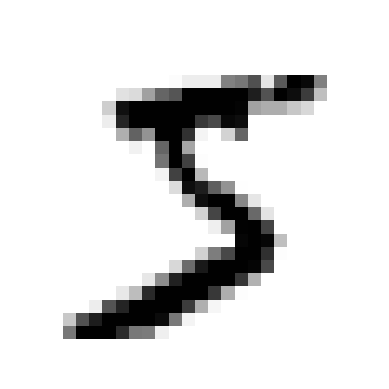

In [3]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [5]:
# Split into training and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## 5 Binary Classifier

In [6]:
from sklearn.linear_model import SGDClassifier

# New train and test sets which are checking for whether or not the digit is 5
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

# Initialize the stochastic gradient descent classifier
sdg_clf = SGDClassifier(random_state=42)

# Fit classifier
sdg_clf.fit(X_train, y_train_5)

# Predict on the 5 from above
sdg_clf.predict([some_digit])

array([ True])

### k Fold Cross-Validation

In [7]:
from sklearn.model_selection import cross_val_score

cross_val_score(sdg_clf, X_train, y_train_5, cv=3, scoring="accuracy")

# It's really good - conclusion? don't use accuracy for evaluating classifiers

array([0.95035, 0.96035, 0.9604 ])

### Confusion Matrix

In [8]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Get model predictions from cross validation
y_train_pred = cross_val_predict(sdg_clf, X_train, y_train_5, cv=3)

# Combine predictions with actual values to create confusion matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm


array([[53892,   687],
       [ 1891,  3530]])

### Precision, Recall, and F1

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

# F1 is harmonic mean of precision and recall
print(f1_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311
0.7325171197343847
